In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
# Generate universe variables
# * Quality and service on subjective ranges [0, 10]
# * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip = np.arange(0, 26, 1)

In [3]:
# Generate fuzzy membership functions
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

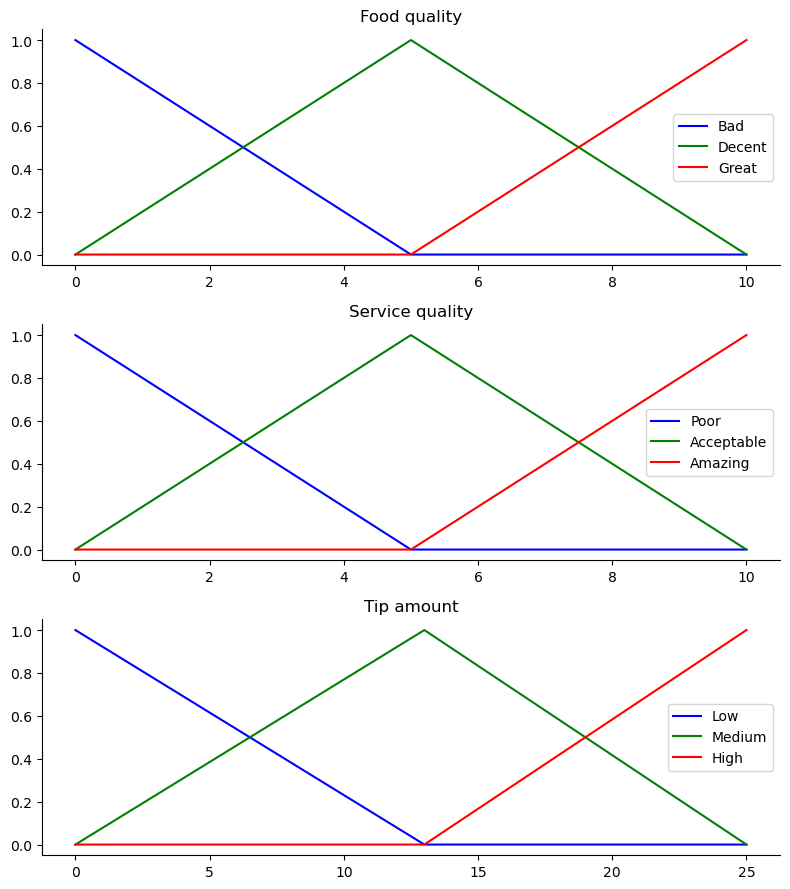

In [4]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

# Trun off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

In [5]:
# We need the activation of our fuzzy membership at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exist for!
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)

In [6]:
# Now we take our rules and apply them. Rule 1 concerns bad food OR service
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

In [7]:
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.min`
tip_activation_lo = np.fmin(active_rule1, tip_lo) # removed entirely to 0

In [8]:
# For rule 2 we connect acceptable service to medium tipping
tip_activation_md = np.fmin(serv_level_md, tip_md)

In [9]:
# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

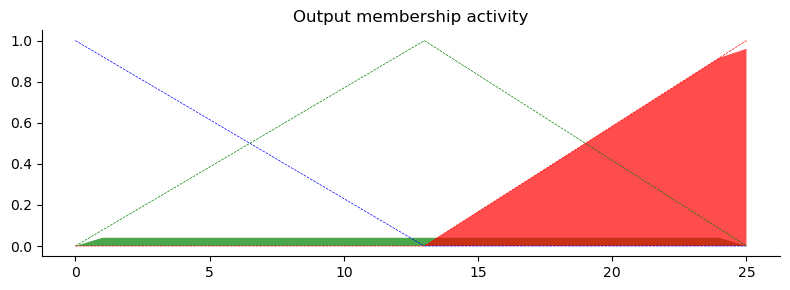

In [10]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

In [11]:
# Aggregrate all three output membership functions together
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

In [12]:
# Calculate defuzzified result
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip) # for plot

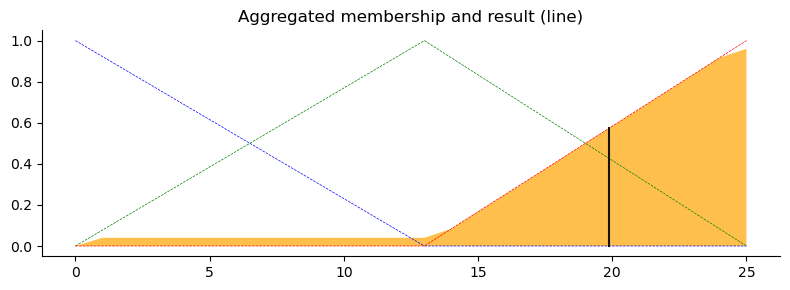

In [13]:
# Visualize this
fix, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

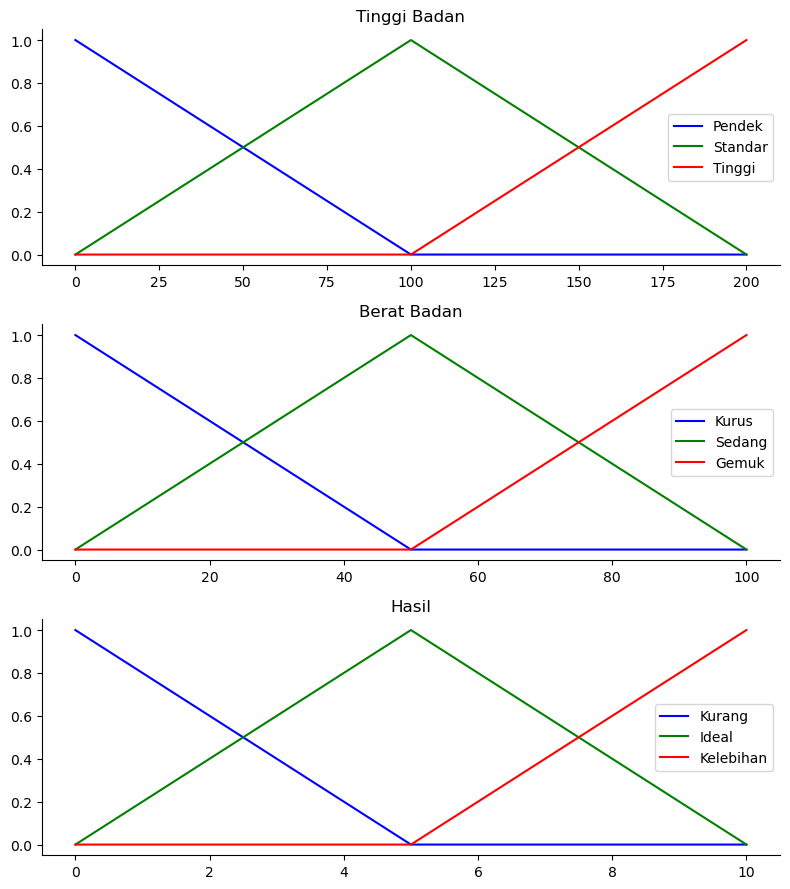

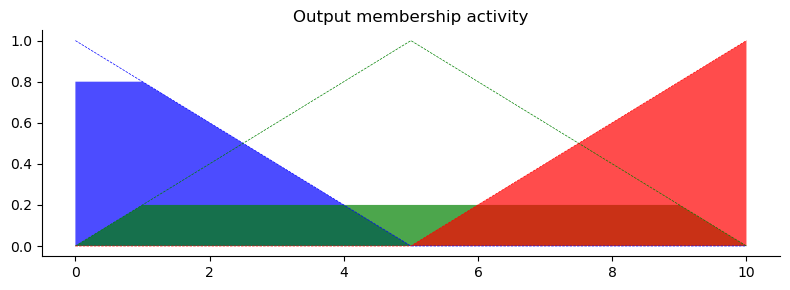

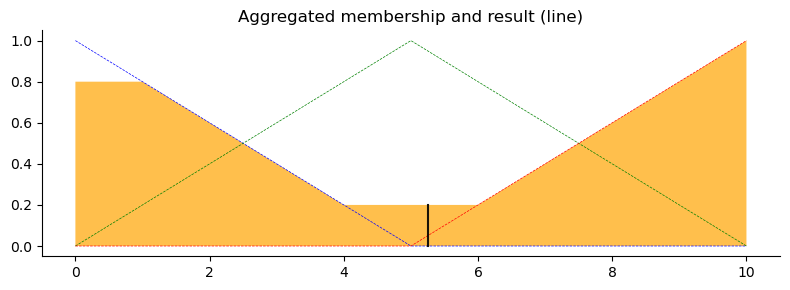

In [14]:
# TUGAS
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Membuat himpunan fuzzy
x_tb = np.arange(0, 201, 1)
x_bb = np.arange(0, 101, 1)
x_hasil = np.arange(0, 11, 1)

# Membuat fungsi keanggotaan
tb_lo = fuzz.trimf(x_tb, [0, 0, 100])
tb_md = fuzz.trimf(x_tb, [0, 100, 200])
tb_hi = fuzz.trimf(x_tb, [100, 200, 200])
bb_lo = fuzz.trimf(x_bb, [0, 0, 50])
bb_md = fuzz.trimf(x_bb, [0, 50, 100])
bb_hi = fuzz.trimf(x_bb, [50, 100, 100])
hasil_lo = fuzz.trimf(x_hasil, [0, 0, 5])
hasil_md = fuzz.trimf(x_hasil, [0, 5, 10])
hasil_hi = fuzz.trimf(x_hasil, [5, 10, 10])

# Memvisualisasikan fungsi keanggotaan
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_tb, tb_lo, 'b', linewidth=1.5, label='Pendek')
ax0.plot(x_tb, tb_md, 'g', linewidth=1.5, label='Standar')
ax0.plot(x_tb, tb_hi, 'r', linewidth=1.5, label='Tinggi')
ax0.set_title('Tinggi Badan')
ax0.legend()

ax1.plot(x_bb, bb_lo, 'b', linewidth=1.5, label='Kurus')
ax1.plot(x_bb, bb_md, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_bb, bb_hi, 'r', linewidth=1.5, label='Gemuk')
ax1.set_title('Berat Badan')
ax1.legend()

ax2.plot(x_hasil, hasil_lo, 'b', linewidth=1.5, label='Kurang')
ax2.plot(x_hasil, hasil_md, 'g', linewidth=1.5, label='Ideal')
ax2.plot(x_hasil, hasil_hi, 'r', linewidth=1.5, label='Kelebihan')
ax2.set_title('Hasil')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

# Pemberian nilai ke dalam fuzzy
tb_level_lo = fuzz.interp_membership(x_tb, tb_lo, 200)
tb_level_md = fuzz.interp_membership(x_tb, tb_md, 200)
tb_level_hi = fuzz.interp_membership(x_tb, tb_hi, 200)

bb_level_lo = fuzz.interp_membership(x_bb, bb_lo, 10)
bb_level_md = fuzz.interp_membership(x_bb, bb_md, 10)
bb_level_hi = fuzz.interp_membership(x_bb, bb_hi, 10)

# Penerapan rule pada fuzzy
active_rule1 = np.fmax(tb_level_lo, bb_level_lo)
hasil_activation_lo = np.fmin(active_rule1, hasil_lo)
hasil_activation_md = np.fmin(bb_level_md, hasil_md)
active_rule3 = np.fmax(tb_level_hi, bb_level_hi)
hasil_activation_hi = np.fmin(active_rule3, hasil_hi)
hasil0 = np.zeros_like(x_hasil)

# Visualisasi fungsi keanggotaan berdasarkan input
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_hasil, hasil0, hasil_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_hasil, hasil_lo, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(x_hasil, hasil0, hasil_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_hasil, hasil_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_hasil, hasil0, hasil_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_hasil, hasil_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

# Aggregasi output
aggregated = np.fmax(hasil_activation_lo,
                     np.fmax(hasil_activation_md, hasil_activation_hi))

# Menghitung hasil defuzzifikasi
hasil = fuzz.defuzz(x_hasil, aggregated, 'bisector')
hasil_activation = fuzz.interp_membership(x_hasil, aggregated, hasil)

# Visualisasi hasil defuzzifikasi
fix, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_hasil, hasil_lo, 'b', linewidth=0.5, linestyle='--')
ax0.plot(x_hasil, hasil_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_hasil, hasil_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_hasil, hasil0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([hasil, hasil], [0, hasil_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()